In [16]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
h2o.cluster().shutdown()

In [18]:
min_mem_size=30 
run_time=500

In [19]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
# min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

30


In [20]:
h2o.init(strict_version_check=False,max_mem_size=min_mem_size)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from c:\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp0prs0un8
  JVM stdout: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp0prs0un8\h2o_Zi_Wei_Fan_started_from_python.out
  JVM stderr: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp0prs0un8\h2o_Zi_Wei_Fan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_168iti
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [21]:
data_path = "data/Amazon_review.csv"

# Load data into H2O
reviews = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
reviews.head(1)

id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",nan,TRUE,nan,0,5,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,nan,nan,Adapter


In [23]:
reviews.shape

(34660, 21)

In [24]:
reviews.describe()

Rows:34660
Cols:21




,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,int,int,int,enum,string,enum,int,int,enum
mins,,,,,,,,,,,NaN,,111372787.0,0.0,1.0,,NaN,,NaN,NaN,
mean,,,,,,,,,,,0.0,,111372787.0,0.6302481614954145,4.584572732260949,,NaN,,0.0,0.0,
maxs,,,,,,,,,,,NaN,,111372787.0,814.0,5.0,,NaN,,NaN,NaN,
sigma,,,,,,,,,,,-0.0,,0.0,13.215775286801591,0.7356529076477819,,NaN,,-0.0,-0.0,
zeros,,,,,,,,,,,0,,0,30820,0,,0,,0,0,
missing,0,6760,2,0,0,0,0,39,10621,0,34660,594,34659,529,33,0,1,4,34660,34660,2
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",nan,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,nan,nan,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",nan,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,nan,nan,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",nan,TRUE,nan,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,nan,nan,DaveZ


In [25]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [26]:
target='reviews.rating'

In [27]:
X=get_independent_variables(reviews, target) 
print(X)

['reviews.didPurchase', 'reviews.id', 'reviews.numHelpful', 'reviews.userCity', 'reviews.userProvince', 'id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.title', 'reviews.username', 'reviews.text']


In [28]:
# Set target and predictor variables
y = target
y

'reviews.rating'

In [29]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [30]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=reviews)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [31]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DRF_1_AutoML_20190313_200000,0.342972,0.585638,0.342972,0.421716,0.127371


In [32]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [33]:
best_model.algo

'drf'

In [34]:
best_model_param = h2o.get_model(aml.leaderboard[0,'model_id'])

In [35]:
best_model_param.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_20190313_200000',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_20190313_200000'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Amazon_review.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Amazon_review.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {

In [36]:
import pandas as pd

In [37]:
reviews_=pd.read_csv("data/Amazon_review.csv")

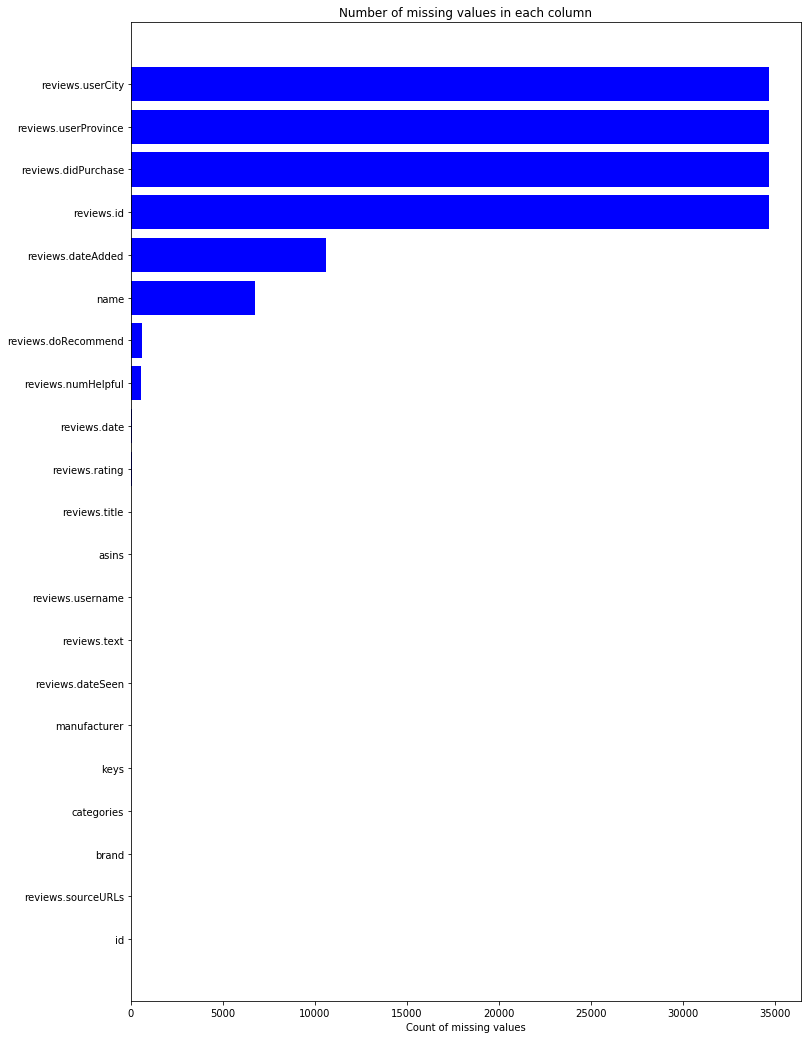

In [38]:
# define the properties missing value variable
properties_missing_df = reviews_.isnull().sum(axis=0).reset_index()
properties_missing_df.columns = ['column_name', 'missing_count']
properties_missing_df = properties_missing_df.ix[properties_missing_df['missing_count']>=0]
properties_missing_df = properties_missing_df.sort_values(by='missing_count')

# set the size and shape of the grapgh
ind = np.arange(properties_missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, properties_missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(properties_missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")

# show the graph
plt.show()

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

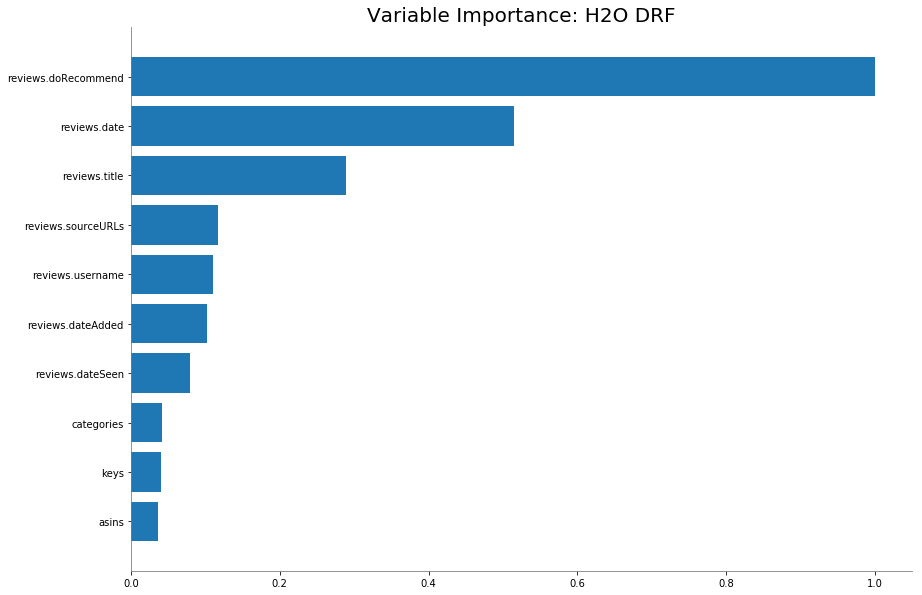

In [40]:
best_model.varimp_plot()

In [41]:
reviews["PositiveReview"] = (reviews["reviews.rating"] >= 4.5).ifelse("1", "0")

In [42]:
reviews["PositiveReview"].table()

PositiveReview,Count
0,10885
1,23775


In [ ]:
#h2o.cluster().shutdown()

### Part 2. Interpretability

#### 0. Why Interpretability?

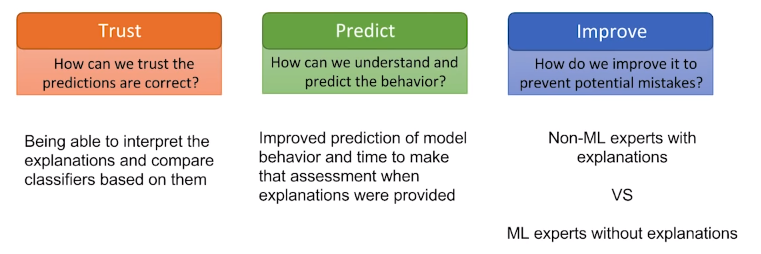

In [44]:
from IPython.display import Image
Image(filename='image/interIntro.png')

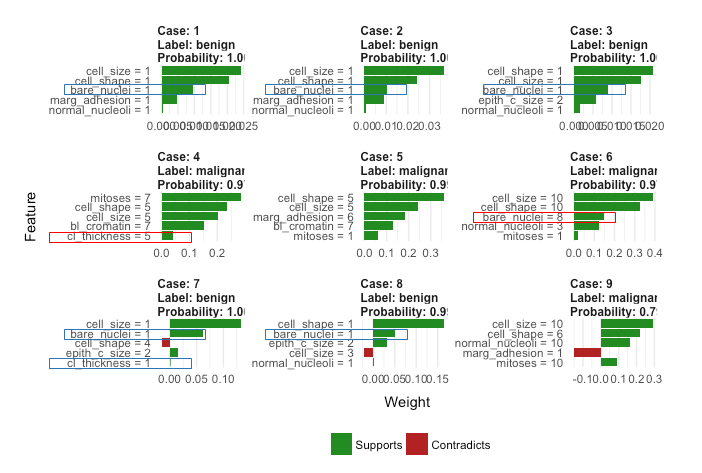

In [46]:
##### E.g.: feature importance: features support/contradict predicted label
Image(filename='image/cancer1.png')

* __Smaller AND more regular cells + low values of bare nuclei (bare_nuclei):__ *  
    correctly indicate: Benign cells    
* __Big, AND irregular cells + higher values of clump thickness (cl_thickness):__ *  
     supports: Malignant label  
It all makes sense.

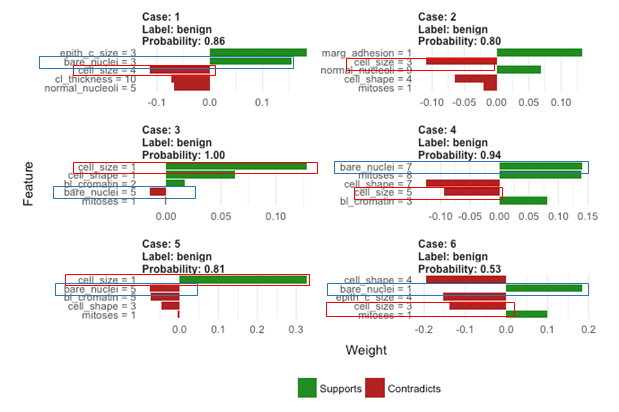

In [48]:
Image(filename='image/cancer2.png')

##### Why? All the wrong cases were predicted to be Benign while they were Malignant  
* __Mainly small and quite regular cells, although some malignant characteristics were still present__ *  
(e.g. Higher values of __'bare nuclei'__ and __'clump thickness'__).  
-------

##### Conclusions: 
##### 1. Improve our understanding of how the ‘black box’ model works and why it makes mistakes.
##### 2. Allow you to make a good educated guess of which features matter. 
-----

#### Step 1. Review the dataset & filter by 'score'

In [70]:
reviews.head(2)

ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text,Train,PositiveReview
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one.",No,0
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring.",Yes,0


In [71]:
# Find the 80th quantile of time in the dataset
time_split = reviews["Time"].quantile(prob = [0.8])[1]
reviews["Train"] = (reviews["Time"] < time_split).ifelse("Yes", "No")

In [72]:
reviews.head(2)

ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text,Train,PositiveReview
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one.",No,0
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring.",Yes,0


In [73]:
#' Add Target Column: "PositiveReview"
# Note mean score around 4.2
reviews["PositiveReview"] = (reviews["Score"] >= 4.2).ifelse("1", "0")

In [74]:
reviews["PositiveReview"].table()

PositiveReview,Count
0,20106
1,35448


#### 2. Train Baseline Model (Or the best model just got trained by H2O.)
* We will start by training a baseline model that does not use the review and instead uses other attributes in our dataset.

In [75]:
# Find the 80th quantile of time in the dataset
time_split = reviews["Time"].quantile(prob = [0.8])[1]
reviews["Train"] = (reviews["Time"] < time_split).ifelse("Yes", "No")

In [76]:
train = reviews[reviews["Train"] == "Yes"]
test = reviews[reviews["Train"] == "No"]

In [77]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = ['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
response = 'PositiveReview'

gbm_baseline = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                            stopping_rounds = 5, score_tree_interval = 10,
                                            model_id = "gbm_baseline.hex"
                                           )
gbm_baseline.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [78]:
print("AUC on Validation Data: " + str(round(gbm_baseline.auc(valid = True), 3)))

AUC on Validation Data: 0.595


* We can see that there is a big room for improvement. Our error is 22%. To improve our model, we will train word embeddings for the review.*

In [79]:
gbm_baseline.confusion_matrix(valid = True)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48181784133938027: 


,0,1,Error,Rate
0,640.0,3572.0,0.8481,(3572.0/4212.0)
1,237.0,6703.0,0.0341,(237.0/6940.0)
Total,877.0,10275.0,0.3416,(3809.0/11152.0)


#### 3. Check the variable importance:

* The variable importance plot below shows us that the most important variable is HelpfulnessNumerator. Looking at the partial dependency plot for that variable, we see that the more people who find the review helpful, the more likely it is a good review.

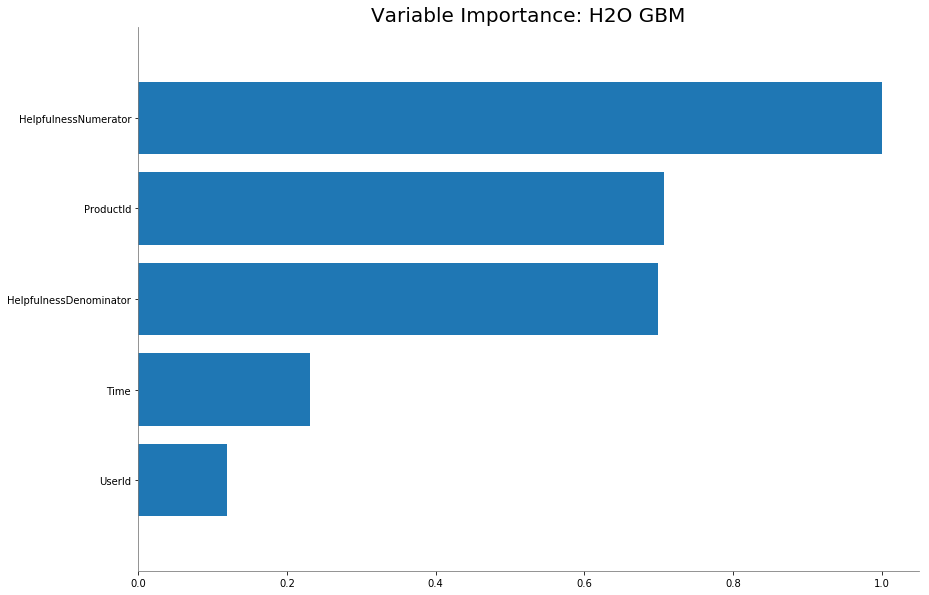

In [80]:
gbm_baseline.varimp_plot()

- The variable importance plot below shows us that the most important variable is HelpfulnessNumerator.

#### 4. Check the partial Dependence Plot:

* A partial dependence plot can show __whether the relationship between the target and a feature__ is linear, monotonous or more complex. 
* For example, when applied to a linear regression model, partial dependence plots always show a linear relationship.*

* __For classification__: where the machine learning model outputs __probabilities__, 
the partial dependence plot: displays the __probability__ for a certain class given different values for feature(s) in S. 
* An easy way to deal with multiple classes is to draw one line or plot per class.

#### e.g. predict the number of bikes that will be rented on a given day:
#### WILL you rent a bike in a hot day? or rainy day? or ....?
* Model: Random forest 
* Relationship visualization: Partial dependence plot to visualize the relationships the model has learned

The influence of the weather features on the predicted bike counts is visualized in the following figure.

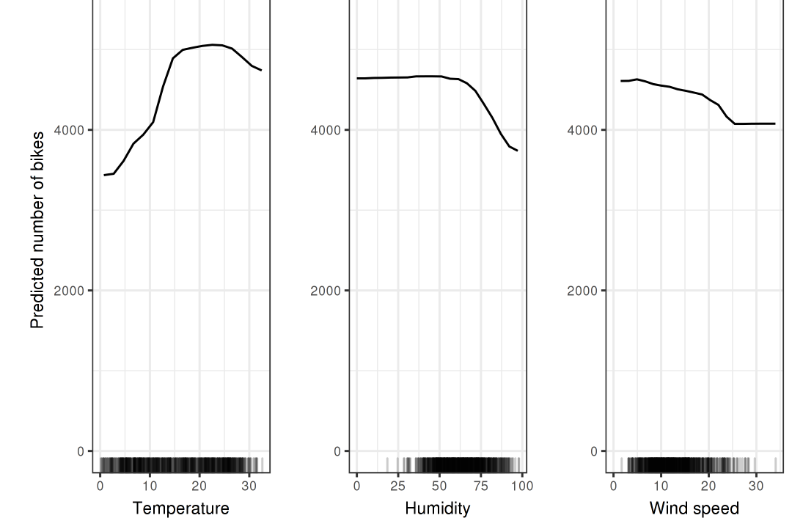

In [66]:
Image(filename='image/plot.png')

#### The Partial dependence plot for the bicycle count prediction model and temperature, humidity and wind speed. 
* The largest differences can be seen in the temperature:
    - The hotter, the more bikes are rented. 
    - This trend goes up to 20 degrees Celsius, then flattens and drops slightly at 30. 
    (Marks on the x-axis indicate the data distribution.)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


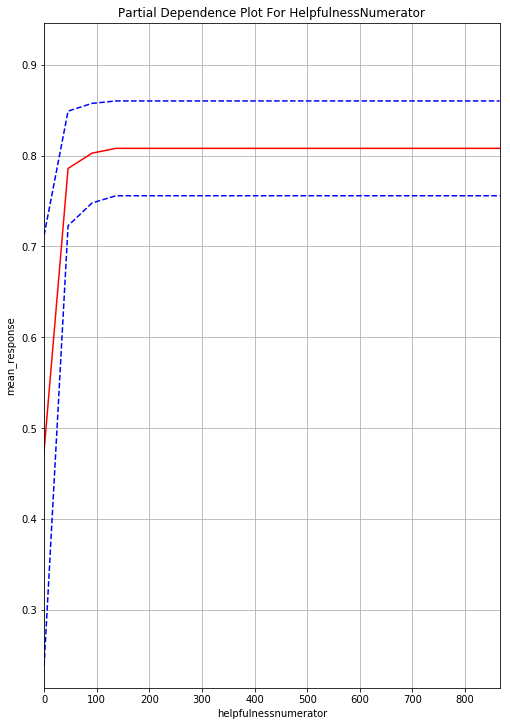

In [81]:
%matplotlib inline  
pdp_helpfulness = gbm_baseline.partial_plot(train, cols = ["HelpfulnessNumerator"])

* The __Variable Importance Plot__  shows us:
    - The most important variable is HelpfulnessNumerator.  
    
* The __Partial Dependency Plot__ shows that:
    - The more people who find the review helpful, the more likely it is a good review:
    - This trend goes up to 40, then flattens after 120. 

In [ ]:
h2o.cluster().shutdown()

-------
### Frequent Questions:  
#### 1. PCA VS. Feature selection:  
* PCA:  
    - A way A very popularly used technique for dimensionality reduction: finding out which features are important for __best describing the variance__ in a data set.  
    - Essentially helps to apply an 80-20 rule: can a small subset of parameters (say 20%) explain 80% or more of the variation in the data? "Combines similar (correlated) attributes and __creates new ones__."
    - Used for __reducing the dimensionality__ of a large data set so that it becomes more practical to apply machine learning.  
    - __Limitations__:  
        - Relies on __Linear relationships__ between feature elements and it's often unclear what the relationships are before you start.  
        - Also "hides" feature elements that contribute little to the variance in the data
        - Eradicate a small but significant differentiator that would affect the performance of a machine learning model.(sometimes)
        - Harder explanation what exactly that PCA component means after combination.
  
  
* Feature Selection:
    - The simplest algorithm is to __test each possible subset of features finding the one which minimises the error rate__.
    - Takes the target into consideration, without combining attributes.
    - Rank your input variables in terms of how useful they are to predict the target value. 
    - Can suggest specific goals in some fields: image processing
    - __Limitations__:  
        - Exhaustive search of the space, and is computationally intractable 
        - The choice of evaluation metric heavily influences the algorithm

#### 2. Feature Selection VS  Feature Extraction
* Feature Selection:
    - Reduce dimensions 
    - Select the features which explain the most of the target variable (has a correlation with the target variable).
    - This test is ran just before the model is applied on the data.
        - E.g.: 10 feature and 1 target variable:
                9 features explain 90% of the target variable and 10 features together explains 91% of the target variable. 
                So the 1 variable is not making much of a difference so you tend to remove that before modelling
                (It is subjective to the business as well). I can also be called as Predictor Importance.
* Feature Extraction:
    - Add dimensions which are computed from other features.
    -  Used in Unsupervised Learning: extraction of contours in images, extraction of Bi-grams from a text, extraction of phonemes from recording of spoken text. 
    - When you don't know anything about the data like no data dictionary, too many features which means the data is not in understandable format. 
    - Then you try applying this technique to get some features which explains the most of the data. 
    - Feature extraction involves a __transformation of the features__, which often is not reversible because some information is lost in the process of dimensionality reduction.

#### 3. TPOT VS. H2O